### File Scheduling


In [2]:
import plotly.graph_objects as go

In [49]:
seq = [176, 79, 34, 60, 92, 11, 41, 114]
init_head = 50
max_track = 199

In [4]:
def get_input():
    sequence = input("I/O sequence (separated by space): ").split()
    sequence = [int(i) for i in sequence]
    return sequence

In [35]:
def display_chart(y, title):
    x = [i for i in range(len(y)+1)]
    
    fig = go.Figure()

    # Scatter Plot with Labels
    scatter = go.Scatter(
        x=x,
        y=y,
        mode='lines+markers+text',  
        text=y,  
        textposition='top center',  
        marker=dict(size=10),
        name='Scatter Plot'
    )

    fig.add_trace(scatter)

    # Customize Layout (Optional)
    fig.update_layout(
        title='Disk Scheduling using ' + title,
        xaxis_title=' ',
        yaxis_title='Track Number',
        xaxis=dict(range=[0, len(y)]),
        yaxis=dict(range=[0, 199])
    )

    fig.show()

### FCFS

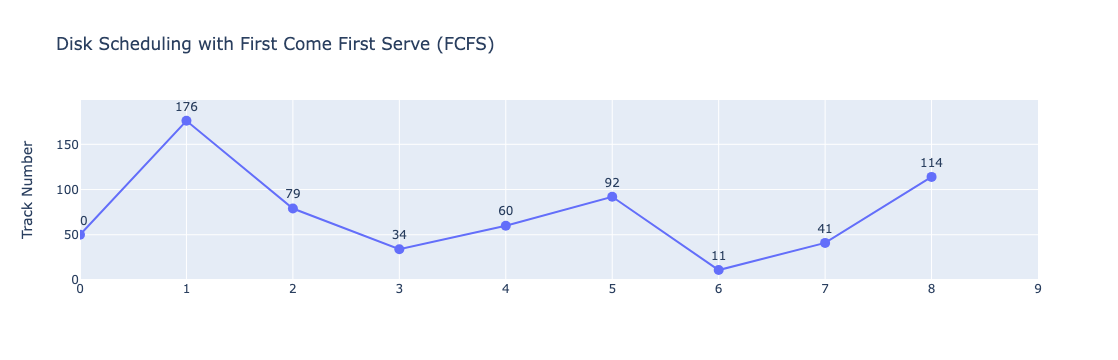

In [38]:
def fcfs(seq):
    seq.insert(0, init_head)
    display_chart(seq, 'First Come First Serve (FCFS)')

fcfs(seq)

### Shortest Seek Time First (SSTF)

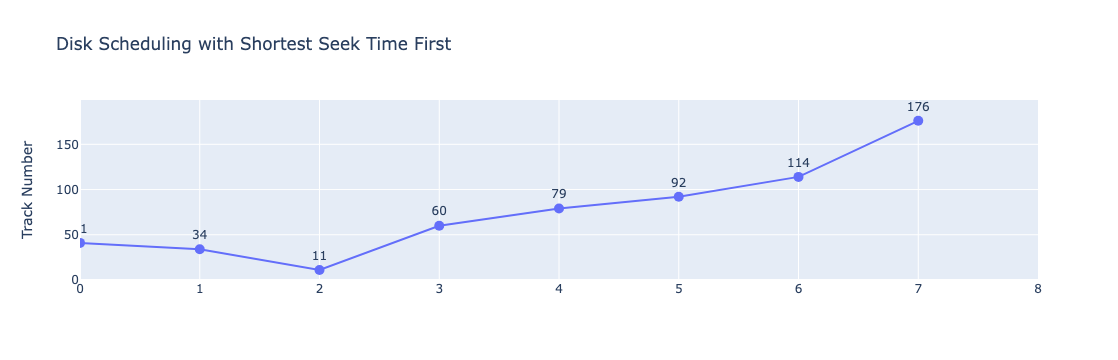

In [85]:
def sstf(seq, init):
    sorted_seq = sorted(seq)
    
    
    current_position = init
    
    result_seq = []
    
    while sorted_seq:
        # Calculate seek time for each request in the sorted sequence
        seek_times = [abs(current_position - request) for request in sorted_seq]
        
        # Find the index of the request with the minimum seek time
        min_seek_index = seek_times.index(min(seek_times))
        
        # Update current position and append the selected request to the result sequence
        current_position = sorted_seq[min_seek_index]
        result_seq.append(current_position)
        
        # Remove the processed request from the sorted sequence
        del sorted_seq[min_seek_index]
        
        
    display_chart(result_seq, "Shortest Seek Time First")
    
    return

sstf(seq, init_head)
    


## SCAN

In [92]:
def scan(dir, seq, head, max_track):
    sorted_seq = sorted(seq)
    result_seq = []
    
    if dir == "left":
        for i in sorted_seq:
            if 0 <= i <= head:
                result_seq.append(i)
        result_seq.reverse()
        result_seq.append(0)
        for i in sorted_seq:
            if head <= i <= max_track:
                result_seq.append(i)
    elif dir == "right":
        for i in sorted_seq:
            if head <= i <= max_track:
                result_seq.append(i)
        result_seq.append(max_track)
        temp = []
        for i in sorted_seq:
            if 0 <= i<= head:
                temp.append(i)
        temp.reverse()
        result_seq += temp
    else:
        print("Invalid/Empty Direction")

    result_seq.insert(0, head)
    
    display_chart(result_seq, "Scan")
    
    return

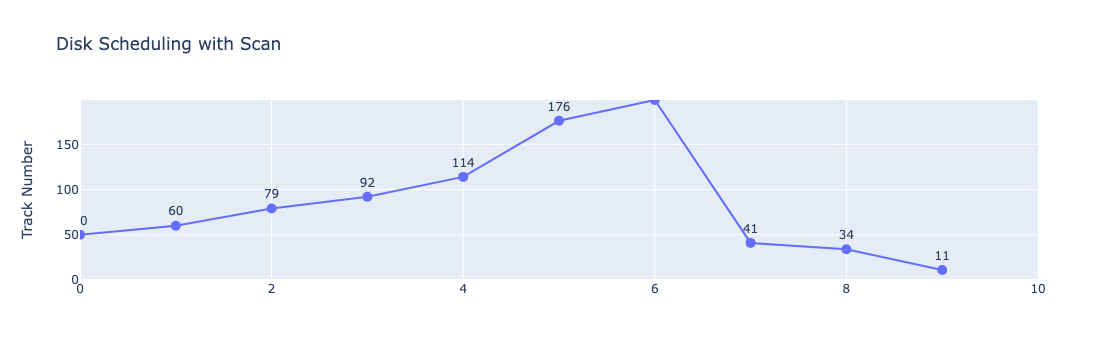

In [94]:
scan_direction = "right"
# left or right

scan(scan_direction, seq, init_head, max_track)


### C-SCAN

In [100]:
def cscan(seq, head, max_track):
    sorted_seq = sorted(seq)
    result_seq = []
    

    for i in sorted_seq:
        if head <= i <= max_track:
            result_seq.append(i)
    result_seq.append(max_track)
    result_seq.append(0)
    temp = []
    for i in sorted_seq:
        if 0 <= i<= head:
            temp.append(i)
    result_seq += temp


    result_seq.insert(0, head)
    
    display_chart(result_seq, "Scan")
    
    
    return

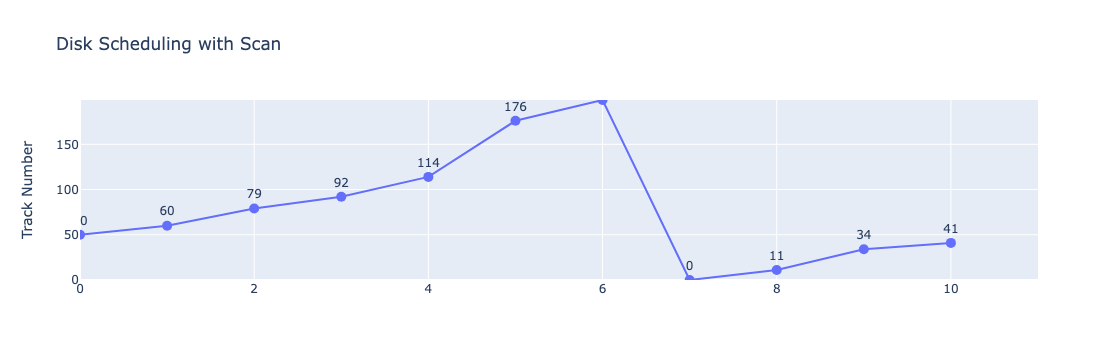

In [102]:
cscan(seq, init_head, max_track)

### LOOK

In [115]:
def look(dir, seq, head, max_track):
    sorted_seq = sorted(seq)
    result_seq = []
    
    if dir == "left":
        for i in sorted_seq:
            if 0 <= i <= head:
                result_seq.append(i)
        result_seq.reverse()
        for i in sorted_seq:
            if head <= i <= max_track:
                result_seq.append(i)
    elif dir == "right":
        for i in sorted_seq:
            if head <= i <= max_track:
                result_seq.append(i)
        temp = []
        for i in sorted_seq:
            if 0 <= i<= head:
                temp.append(i)
        temp.reverse()
        result_seq += temp
    else:
        print("Invalid/Empty Direction")

    result_seq.insert(0, head)
    
    display_chart(result_seq, "Look")
    
    return

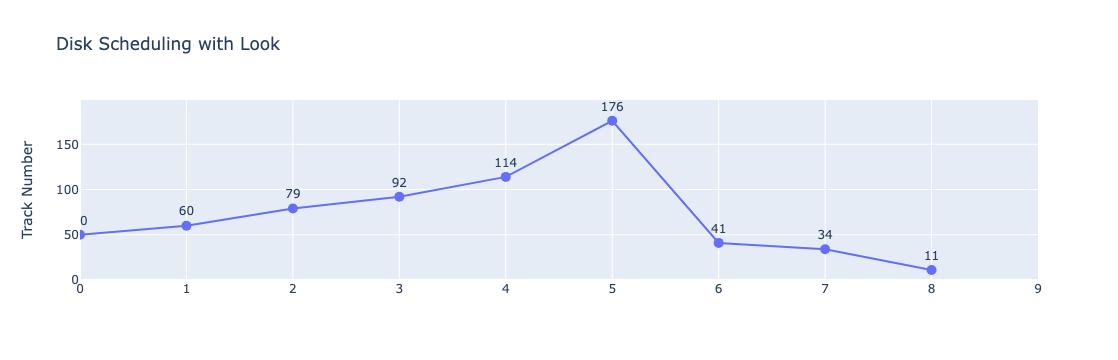

In [116]:
look_direction = "right"
look(look_direction, seq, init_head, max_track)

### C-LOOK

In [113]:
def clook(seq, head, max_track):
    sorted_seq = sorted(seq)
    result_seq = []
    

    for i in sorted_seq:
        if head <= i <= max_track:
            result_seq.append(i)
    temp = []
    for i in sorted_seq:
        if 0 <= i<= head:
            temp.append(i)
    result_seq += temp


    result_seq.insert(0, head)
    
    display_chart(result_seq, "C-Look")
    
    
    return

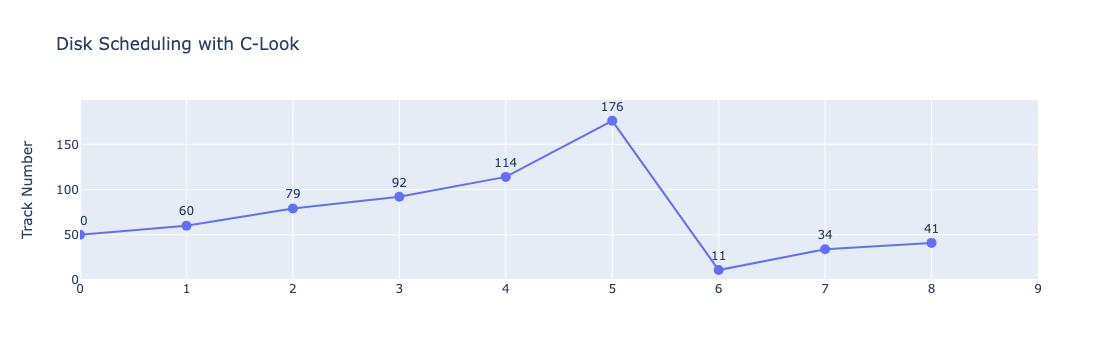

In [114]:
clook(seq, init_head, max_track)